In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys


sys.path.append('../')

In [3]:
x_train = np.load("../data/x_train.npy")
y_train = np.load("../data/y_train.npy")

x_val = np.load("../data/x_val.npy")
y_val = np.load("../data/y_val.npy")

# Dimensionality reduction
In the given notebook I will perform some evaluation of different dimensionality reduction algorithms that will be leveraged to train a simple classifier on them. I will not assess the classfier performance, only the algorithms - I want to get the intuition how they exactly work.

The goal of the notebook would be to create such a dimensionality reduction algorithm that would be already optimized using grid-search or some different automatic method.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer

import numpy as np

In [10]:
x_train = np.load("../data/x_train.npy")
y_train = np.load("../data/y_train.npy")

x_val = np.load("../data/x_val.npy")
y_val = np.load("../data/y_val.npy")

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

pca = PCA(n_components=0.5)
x_train_pca = pca.fit_transform(x_train)

In [12]:
clf = RandomForestClassifier()

clf.fit(x_train_pca, y_train)

x_val_pca = pca.transform(x_val)
y_pred = clf.predict(x_val_pca)

In [13]:
print("Accuracy: ", np.mean(y_pred == y_val))

Accuracy:  0.525


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for PCA


param_grid = {
    'pca__n_components': [2, 3, 4, 5, 8, 10, 15, 20, 30, 40, 50, 70, 100, 150, 200, 300, 400],
    'pca__svd_solver': ['full', 'arpack', 'randomized'],
    # 'rf__n_estimators': [50, 100],
    # 'rf__max_depth': [None, 10],
    # 'rf__min_samples_split': [5]
}

scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5, verbose=2)
grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')

Fitting 5 folds for each of 51 candidates, totalling 255 fits
[CV] END ..........pca__n_components=2, pca__svd_solver=full; total time=   3.9s
[CV] END ..........pca__n_components=2, pca__svd_solver=full; total time=   1.3s
[CV] END ..........pca__n_components=2, pca__svd_solver=full; total time=  22.7s
[CV] END ..........pca__n_components=2, pca__svd_solver=full; total time=   0.6s
[CV] END ..........pca__n_components=2, pca__svd_solver=full; total time=   0.6s
[CV] END ........pca__n_components=2, pca__svd_solver=arpack; total time=   0.5s
[CV] END ........pca__n_components=2, pca__svd_solver=arpack; total time=   0.4s
[CV] END ........pca__n_components=2, pca__svd_solver=arpack; total time=   0.4s
[CV] END ........pca__n_components=2, pca__svd_solver=arpack; total time=   0.4s
[CV] END ........pca__n_components=2, pca__svd_solver=arpack; total time=   0.5s
[CV] END ....pca__n_components=2, pca__svd_solver=randomized; total time=   0.4s
[CV] END ....pca__n_components=2, pca__svd_solv

In [33]:
best_params = grid_search.best_params_
print('Best Parameters:')
for param_name, param_value in best_params.items():
    print(f'{param_name}: {param_value}')

Best Parameters:
pca__n_components: 15
pca__svd_solver: randomized


it looks like the accuracy on the test set is quite poor, the result is not really satisfying

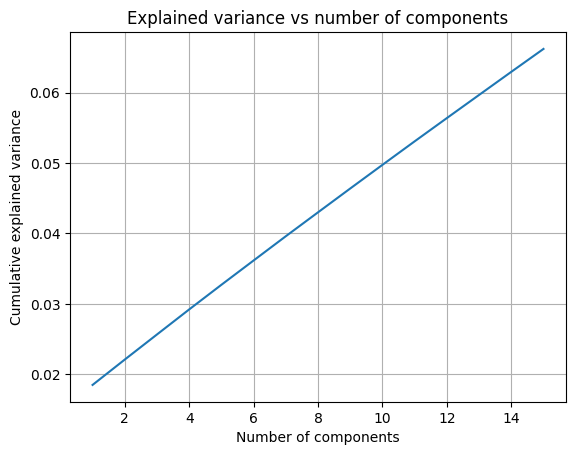

In [34]:
# visualize the pca
pca = best_model.named_steps['pca']
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = len(explained_variance)
plt.plot(range(1, n_components + 1), cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs number of components')
plt.grid()

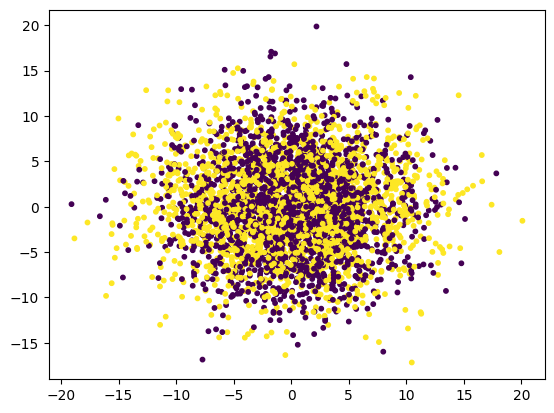

In [37]:
# plot the pca components
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', s=10)

In [9]:
from sklearn.cluster import FeatureAgglomeration

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('fa', FeatureAgglomeration()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for PCA


param_grid = {
    'fa__n_clusters': [2, 3, 4, 5, 8, 10, 15, 20, 30, 40, 50, 70, 100, 150, 200, 300, 400],
    'fa__linkage': ['ward', 'complete', 'average', 'single'],
    # 'rf__n_estimators': [50, 100],
    # 'rf__max_depth': [None, 10],
    # 'rf__min_samples_split': [5]
}

scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5, verbose=2)
grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')

Fitting 5 folds for each of 68 candidates, totalling 340 fits
[CV] END .................fa__linkage=ward, fa__n_clusters=2; total time=   0.5s
[CV] END .................fa__linkage=ward, fa__n_clusters=2; total time=   0.6s
[CV] END .................fa__linkage=ward, fa__n_clusters=2; total time=   0.5s
[CV] END .................fa__linkage=ward, fa__n_clusters=2; total time=   0.5s
[CV] END .................fa__linkage=ward, fa__n_clusters=2; total time=   0.5s
[CV] END .................fa__linkage=ward, fa__n_clusters=3; total time=   0.5s
[CV] END .................fa__linkage=ward, fa__n_clusters=3; total time=   0.5s
[CV] END .................fa__linkage=ward, fa__n_clusters=3; total time=   0.5s
[CV] END .................fa__linkage=ward, fa__n_clusters=3; total time=   0.5s
[CV] END .................fa__linkage=ward, fa__n_clusters=3; total time=   0.5s
[CV] END .................fa__linkage=ward, fa__n_clusters=4; total time=   0.8s
[CV] END .................fa__linkage=ward, fa_

here results are better, but still not enough

In [10]:
best_params = grid_search.best_params_
print('Best Parameters:')
for param_name, param_value in best_params.items():
    print(f'{param_name}: {param_value}')

Best Parameters:
fa__linkage: ward
fa__n_clusters: 400


### Sparse PCA in feature selection

In [16]:
pca = PCA(n_components=15, svd_solver='randomized')

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_pca = pca.fit_transform(x_train_scaled)

# check the explained variance of features
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.01849979, 0.02211605, 0.02570774, 0.02927275, 0.03275316,
       0.0362184 , 0.03964816, 0.04302573, 0.0463903 , 0.04970807,
       0.05301037, 0.05628034, 0.05953906, 0.06276875, 0.06597918])

## general conslusion
In general, the results seem to be not satifysing enough when it comes to dimensionality reduction methods. Even though in some settings this approach might be appropiate, in our case, since our general objective is to use as little features as possible, we won't be exploring this simple approach any further for now.

The dimensionality reduction methods could be eventually used on top of feature selection algorithms or could help in feature selection.